In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import streamlit as st
import pickle
import cv2 as cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
st.title('Heart Failure Predictions using Machine Learning ')

2021-12-03 16:43:26.752 
  command:

    streamlit run C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [3]:
image = cv2.imread("C:\Lachin\DataSets\Heart Failure Prediction\heart.jpg")

In [4]:
st.image(image)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [5]:
data = pd.read_csv("C:\Lachin\DataSets\Heart Failure Prediction\heart.csv")

In [6]:
st.header('Training Data Set')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [7]:
st.dataframe(data)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [10]:
st.header('Data Analysis')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [11]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [21]:
def cpt():
    fig = plt.figure(figsize=(6,6))
    sns.countplot(data['ChestPainType'], hue=data['HeartDisease'])
    plt.title('Chest Pain Type vs Heart Disease')
    st.pyplot(fig)

def fbs():
    fig1 = plt.figure(figsize=(6,6))
    sns.countplot(data['FastingBS'], hue=data['HeartDisease'],palette='Set1')
    plt.title('Fasting Blood Sugar vs Heart Disease')
    st.pyplot(fig1)

def ea():
    fig2 = plt.figure(figsize=(6,6))
    sns.countplot(data['ExerciseAngina'], hue=data['HeartDisease'],palette='Set2')
    plt.title('Exercise Angina vs Heart Disease')
    st.pyplot(fig2)
    
def slope():
    fig3 = plt.figure(figsize=(8,8))
    sns.countplot(data['ST_Slope'], hue=data['HeartDisease'],palette='Set3')
    plt.title('Slope of the Peak Exercise vs Heart Disease')
    st.pyplot(fig3)

In [24]:
def analysis():
    st.subheader('Variable Explanation')
    st.markdown('**ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]')
    st.markdown('**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]')
    st.markdown('**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]')
    st.markdown('**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]')
    st.markdown('**HeartDisease:** output class [1: heart disease, 0: Normal]')
    st.subheader('Visualaizing Significant Variables')
    sd = st.selectbox('Select a variable',['Chest Pain Type','FastingBS','Exercise Angina','ST_slope'])
    
    if (sd == 'Chest Pain Type'):
        cpt()
    elif (sd == 'FastingBS'):
        fbs()
    elif (sd == 'Exercise Angina'):
        ea()
    elif (sd == 'ST_slope'):
        slope()
        
    
    

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


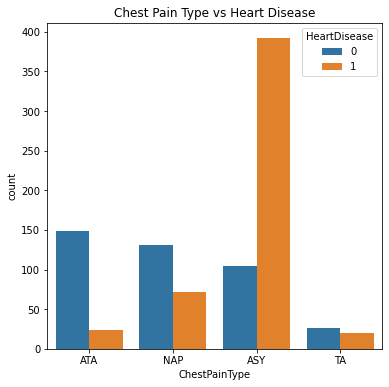

In [25]:
a = analysis()

In [26]:
st.header('Check Your Status......')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [27]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [61]:
def user_inputs():
    age = st.slider('Your Age',1,100,30)
    sex = st.radio('Gender',['M','F'])
    cpt = st.selectbox('chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]',
                       ['TA','ATA','NAP','ASY'])
    rbp = st.slider('Resting Blood Pressure [mm/Hg]',0,250,100)
    cho = st.slider('Cholesterol [mm/dl]',100,700,150)
    fbs = st.radio('fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]',[0,1])
    rcg = st.selectbox('Resting ECG',['Normal','ST','LVH'])
    mhr = st.slider('Maximum Heart Rated',0,250,120)
    ea = st.radio('ExerciseAngina',['Y','N'])
    ope = st.slider('OldPeak',-10,20,5)
    slope = st.selectbox('The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]',['Up','Flat','Down'])
    
    input_data = {
        'Age':age,
        'Sex':sex,
        'ChestPainType':cpt,
        'RestingBP':rbp,
        'Cholesterol':cho,
        'FastingBS':fbs,
        'RestingECG':rcg,
        'MaxHR':mhr,
        'ExerciseAngina':ea,
        'Oldpeak':ope,
        'ST_Slope':slope
        
        
    }
    
    data1 = data.copy()
    data1.drop('HeartDisease', axis=1, inplace=True)
    test_data = pd.DataFrame(input_data, index=[0])
    new_data = pd.concat([data1,test_data], ignore_index=True, axis = 0)
    dum_data = pd.get_dummies(new_data, columns=['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)
    variable = dum_data.iloc[-1,:]
    c = pd.DataFrame([variable.array], columns=dum_data.columns)
    return c

In [62]:
predictions = user_inputs()

In [64]:
st.header('User Details...')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [65]:
st.dataframe(predictions)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [66]:
load_model = pickle.load(open('Heart_Failure_Predictions.pkl','rb'))

In [67]:
df = pd.read_csv("C:\Lachin\DataSets\Heart Failure Prediction\heart_dummy.csv")

In [68]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,1,1,0,0,0,1,0,0,0,1
1,49,160,180,156,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,130,283,98,0.0,0,1,1,0,0,0,0,1,0,0,1
3,48,138,214,108,1.5,1,0,0,0,0,0,1,0,1,1,0
4,54,150,195,122,0.0,0,1,0,1,0,0,1,0,0,0,1


In [69]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [71]:
s = load_model.predict(x_test.iloc[-1:,:])
if s[0]==0:
    print('Hi')

Hi


In [74]:
def pred():
    st.header('User Report!!!')
    y = load_model.predict(predictions)
    if (y[0] == 0):
        st.subheader('No Sign of Heart Failure.....Stay Healthy!!!')
        st.metric('Accuracy of the Predictions', value=(accuracy_score(y_train,load_model.predict(x_train))*100))
    elif (y[0] == 1):
        st.subheader('There is a Higher Probability of Heart Failure...')
        st.subheader('Please visit a Consultant as soon as possible')
        st.metric('Accuracy of the Predictions', value=(accuracy_score(y_train,load_model.predict(x_train))*100))
        

In [73]:
pred()